# Basic Mapping in Python with Cartopy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

## GeoAxes

In matplotlib, you make a figure object, which can have one or more axes objects. In Cartopy axes are called GeoAxes, which have additional attributes, the main one being a projection. The projection of a map is how information on a sphere is mapped onto a 2D surface. In the code below, we make a normal figures and give it a "PlateCarree" ("flat square" in French) projection. Anything that is subsequently plotted on this plot will be in this projection

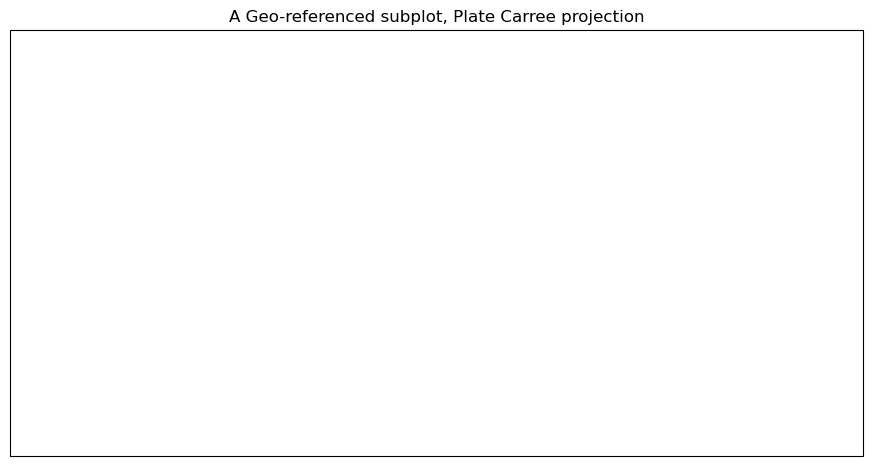

In [2]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection");

One of the powerful aspects of Cartopy is that it can use and manipulate shape files. Shape files are a common file format for staying geographic data. They are used by GIS software, Python, MATLAB, etc. The command below just plots the coastlines of the world

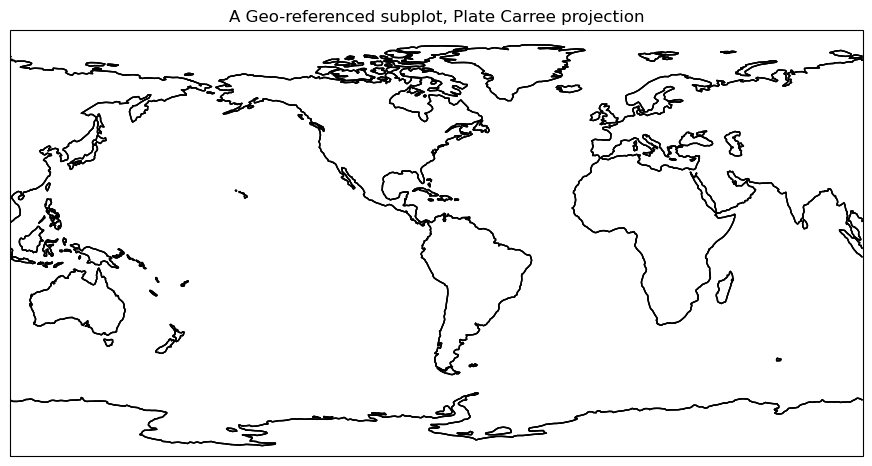

In [5]:
ax.coastlines()
fig #replot figure initialized above

Cartopy provides other cartographic features in shapefiles via its features class. The shapefiles are downloaded when their cartographic features are used for the first time in a script or notebook. We can add these features to our subplot via the add_feature method. A list of the various Natural Earth shapefiles can be found at https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html.

/Users/arobel3/anaconda3/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/arobel3/anaconda3/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


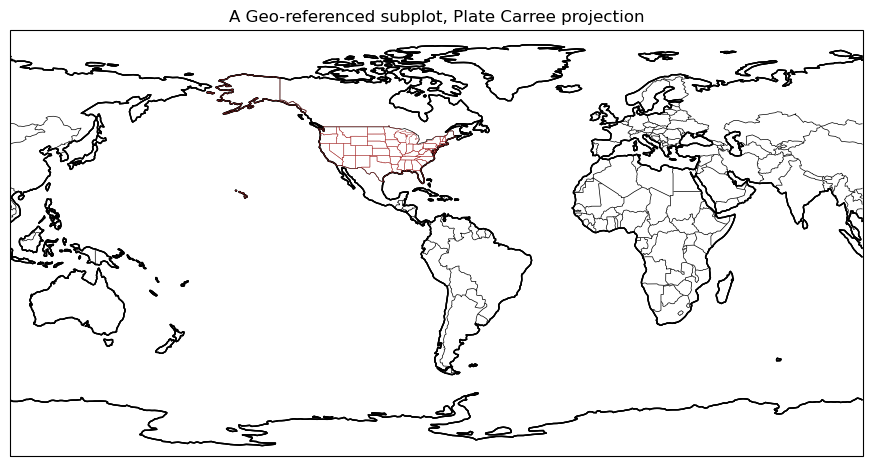

In [6]:
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black') #national borders
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')  #state borders
fig

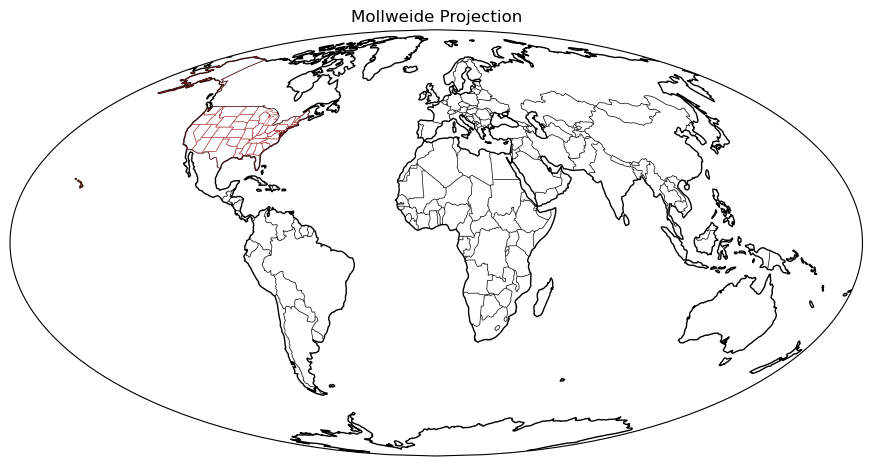

In [9]:
fig = plt.figure(figsize=(11, 8.5))
projMoll = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=projMoll) #now with a Mollweide projection!
ax.set_title("Mollweide Projection")

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black') #national borders
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')  #state borders

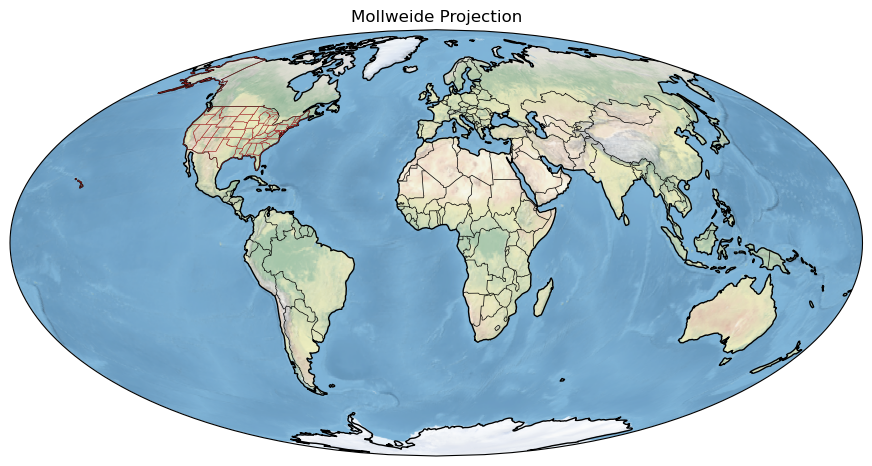

In [10]:
ax.stock_img() #and we can easily add in a stock image colored by elevation
fig

We can use set_extent to restrict the map coverage to a region. Let’s also choose a lower resolution for coastlines, just to illustrate how one can specify that. In addition, let’s also plot the latitude and longitude lines. Natural Earth defines three resolutions for cartographic features, specified as the strings “10m”, “50m”, and “110m”. Only one resolution can be used at a time.

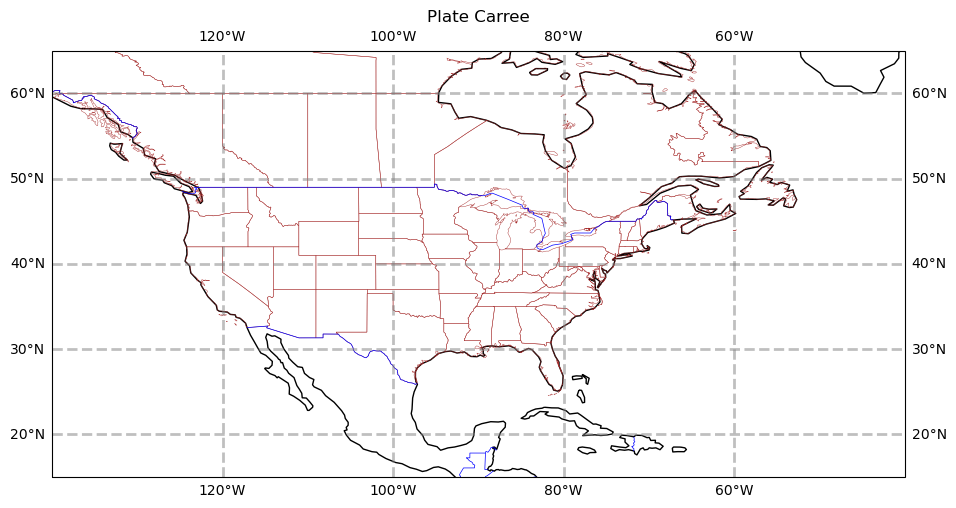

In [13]:
projPC = ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') #lat/lon lines
ax.set_extent([lonW, lonE, latS, latN], crs=projPC) #set to regional projections
ax.coastlines(resolution=res, color='black') #use lower res coastline data
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

Lots of features are available to plot with add_feature. Here is an example centered over Georgia.

In [1]:
latN = 35.2
latS = 30.2
lonW = -87.0
lonE = -80.0
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
projLccGA = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccGA)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.set_title('Atlanta and Vicinity');

NameError: name 'ccrs' is not defined

Below is an example of mapping with overlaid data. We just make an array of a periodic field and then plot it on top of a world map using normal matplotlib functionality (since the projection has been defined already).

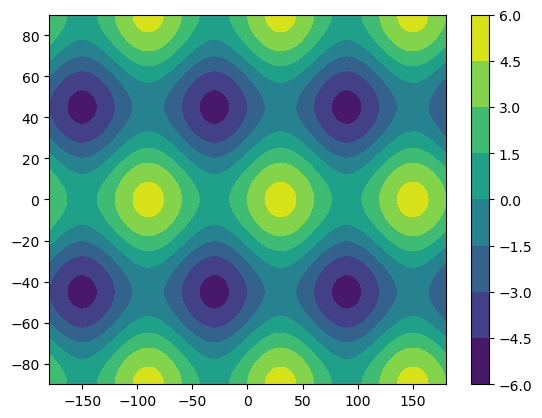

In [19]:
lon, lat = np.mgrid[-180:181, -90:91]
data = 2 * np.sin(3 * np.deg2rad(lon)) + 3 * np.cos(4 * np.deg2rad(lat))
plt.contourf(lon, lat, data)
plt.colorbar();

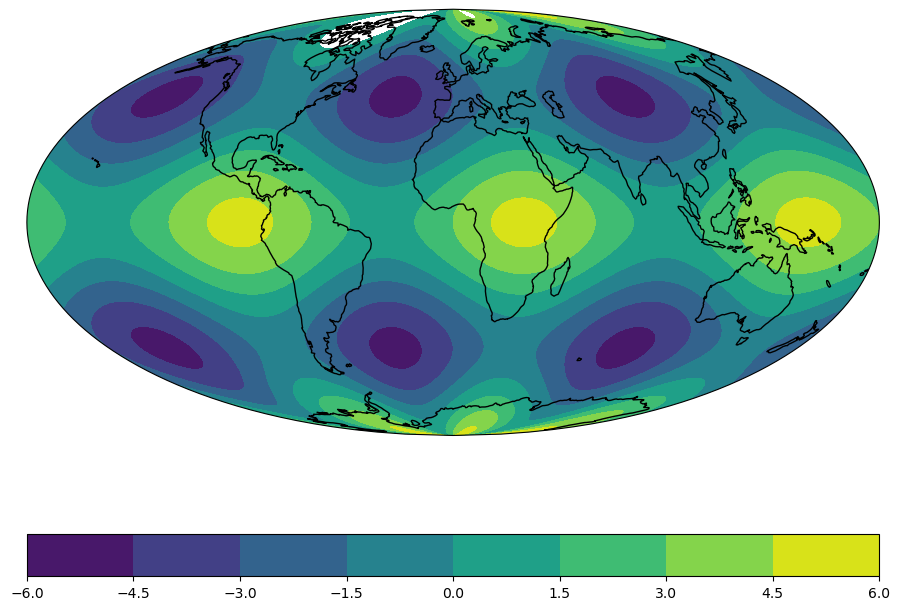

In [20]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.coastlines()
dataplot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(dataplot, orientation='horizontal');

The Cartopy documentation has a really nice gallery of more advanced map examples for inspiration:
https://scitools.org.uk/cartopy/docs/latest/gallery/index.html